# Plotting with Confidence Bands

*This is a supplementary notebook dealing with plotting. It focuses more on plotting than it does on fitting, although it uses the lmfit library to do so.*

Previously, we have plotted our fits with our fitted parameters and viewed the statistics of the parameters.  
What if we want to see the uncertainty on the parameters visually?
Fortunately, lmfit and matplotlib have some built-in functions that we can use together rather easily to acheive this goal.

In [1]:
#Imports
import lmfit as lf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

The code below should be familiar; it's just the setup for our function *y = f(x) = x<sup>2</sup>*. I hid it to save space. Below that, we're going to make some slight changes to our fitting code:

In [2]:
#y = f(x) = x^2
#Fakedata
xdata = np.linspace(0,5,50)
ydata = np.zeros(len(xdata))
noise = np.random.normal(0,1,len(xdata))
for i,n in enumerate(xdata):
    ydata[i] = n**2+noise[i]
sigdata = np.ones(len(xdata))
#Function
def f(x,a,b,c):
    return a*x**2+b*x+c
#Points representing function
ycurve = xdata**2 

In [3]:
#Setup
weighdata = 1/sigdata
l_mod = lf.Model(f)
params = l_mod.make_params(a=1, b=0, c=0)
#Do fit
l_fit = l_mod.fit(ydata, params, x=xdata, weights=weighdata)
#We don't need to create the dictionary to call everything this time.
#Instead, we're going to define:
sig = l_fit.eval_uncertainty() #this is the uncertainty on the y-values of our fit.
#We also don't need to make the 'l_curve variable'

l_fit #Display information about the fit (I'll hide the output since we've already seen it.)

## Plotting
Plotting is also going to look pretty different.
Before, we were defining all of our variables for plotting. As it turns out, lmfit already has some built-in functions designed for this, so we're going to use those here instead.
We'll also, of course, be adding the confidence band to our plot.

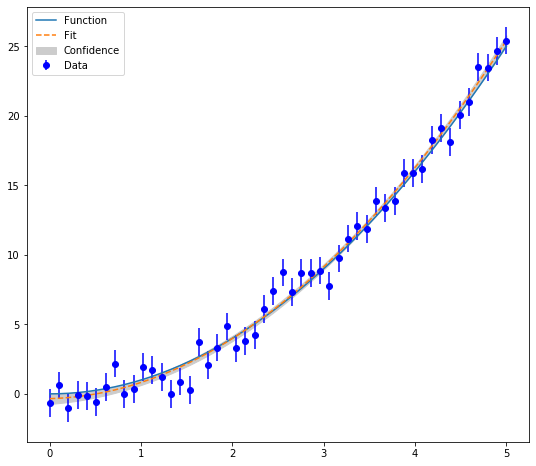

In [4]:
#Plotting
fig = plt.figure(figsize=(9.0,8.0))

plt.errorbar(xdata,ydata,yerr=sigdata,fmt='bo',label='Data')
plt.plot(xdata,ycurve,label='Function')
plt.plot(xdata,l_fit.best_fit,linestyle='--',label='Fit') #note that we changed our y-data here
plt.fill_between(xdata,l_fit.best_fit-sig,l_fit.best_fit+sig,label='Confidence',color='#CCCCCC')

plt.legend()
plt.show()

As you can see, we have a pretty good confidence for this fit which seems to overlap with the true function at most points.</br>

## Changing our Confidence Level

We stuck with the default, which was 1 &sigma; ; let's take a look at how we can change that and what the change looks like

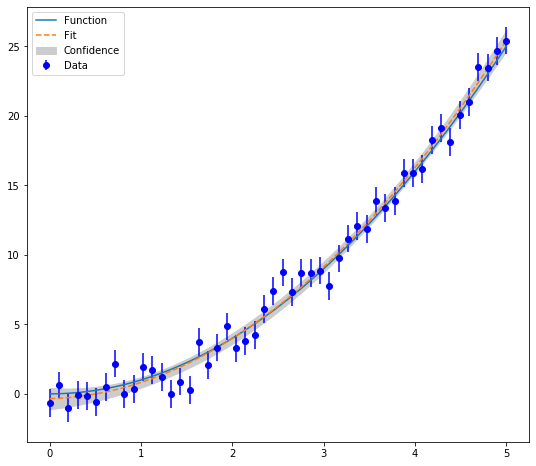

In [5]:
#Plotting
fig = plt.figure(figsize=(9.0,8.0))

sig = l_fit.eval_uncertainty(sigma=2) #use 2 sigmas instead of 1

plt.errorbar(xdata,ydata,yerr=sigdata,fmt='bo',label='Data')
plt.plot(xdata,ycurve,label='Function')
plt.plot(xdata,l_fit.best_fit,linestyle='--',label='Fit') #note that we changed our y-data here
plt.fill_between(xdata,l_fit.best_fit-sig,l_fit.best_fit+sig,label='Confidence',color='#CCCCCC')

plt.legend()
plt.show()

Now we see that the entire original function is contained within our confidence band.

If we give the function &sigma; < 1, we can set the probability we want. Let's say we want to have a confidence band such that we're 95% sure that the true curve is somewhere within it:

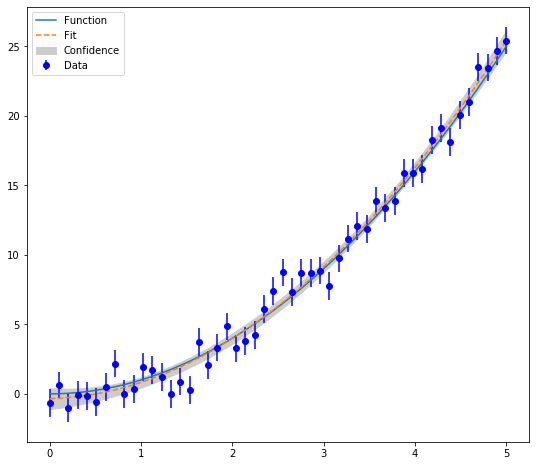

In [6]:
#Plotting
fig = plt.figure(figsize=(9.0,8.0))

sig = l_fit.eval_uncertainty(sigma=0.95) #use 2 sigmas instead of 1

plt.errorbar(xdata,ydata,yerr=sigdata,fmt='bo',label='Data')
plt.plot(xdata,ycurve,label='Function')
plt.plot(xdata,l_fit.best_fit,linestyle='--',label='Fit') #note that we changed our y-data here
plt.fill_between(xdata,l_fit.best_fit-sig,l_fit.best_fit+sig,label='Confidence',color='#CCCCCC')

plt.legend()
plt.show()

This looks identical to the plot above -- that's good! 2&sigma; is supposed to represent 95% certainty, so we can reasonably conclude that it's working how we expect it to. What if we set the confidence very high?

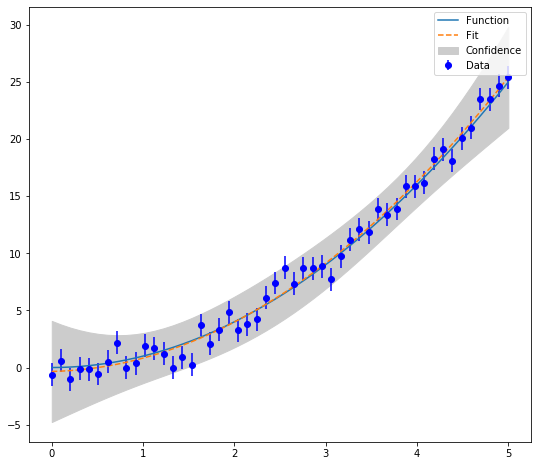

In [7]:
#Plotting
fig = plt.figure(figsize=(9.0,8.0))

sig = l_fit.eval_uncertainty(sigma=0.999999999999999) #use 2 sigmas instead of 1

plt.errorbar(xdata,ydata,yerr=sigdata,fmt='bo',label='Data')
plt.plot(xdata,ycurve,label='Function')
plt.plot(xdata,l_fit.best_fit,linestyle='--',label='Fit') #note that we changed our y-data here
plt.fill_between(xdata,l_fit.best_fit-sig,l_fit.best_fit+sig,label='Confidence',color='#CCCCCC')

plt.legend()
plt.show()

This is as high as I could set it (anything else rounded to 1, which was treated as 1 sigma value -- 100% confidence would be every value possible)! We see that all data points are contained within this new, much larger band, as we might expect (although it is not impossible to get data points outside of it, as we can't ever acheive 100% certainty).